In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
from sklearn.metrics import r2_score

from datautilities import meshmethods as mm

In [13]:
nregion = 3
region = f"Region{nregion}LR4"

root_dir = Path("../Data") / region

res = "HR_6cpu"
test_years = 1964

pred_fname = f"region{nregion}-lr8-migraphnet-59-60-61-62-63-15-5-wreg-hs-dir"
pred_lin_fname = "poly-lr8-59-60-61-62-63-hs-dir"

In [14]:
# Load test and prediction data, delete nan nodes
y_test = mm.load_data(root_dir=root_dir, res=res, years=test_years)
drop_idx = np.load(root_dir / res / "drop_index.npy")
y_test = np.delete(y_test, drop_idx, axis=1).flatten()

pred = np.load(root_dir / "predictions" / f"{pred_fname}.npy")
pred_lin = np.load(root_dir / "predictions" / f"{pred_lin_fname}.npy").flatten()

/home/jannik/Documents/PhD/Super_Resolution_General/SROnUnstructuredGrids/datautilities/datautilities/meshmethods.py:106: RuntimeWarning: invalid value encountered in cast
  data[idx] = np.load(fpath).squeeze()


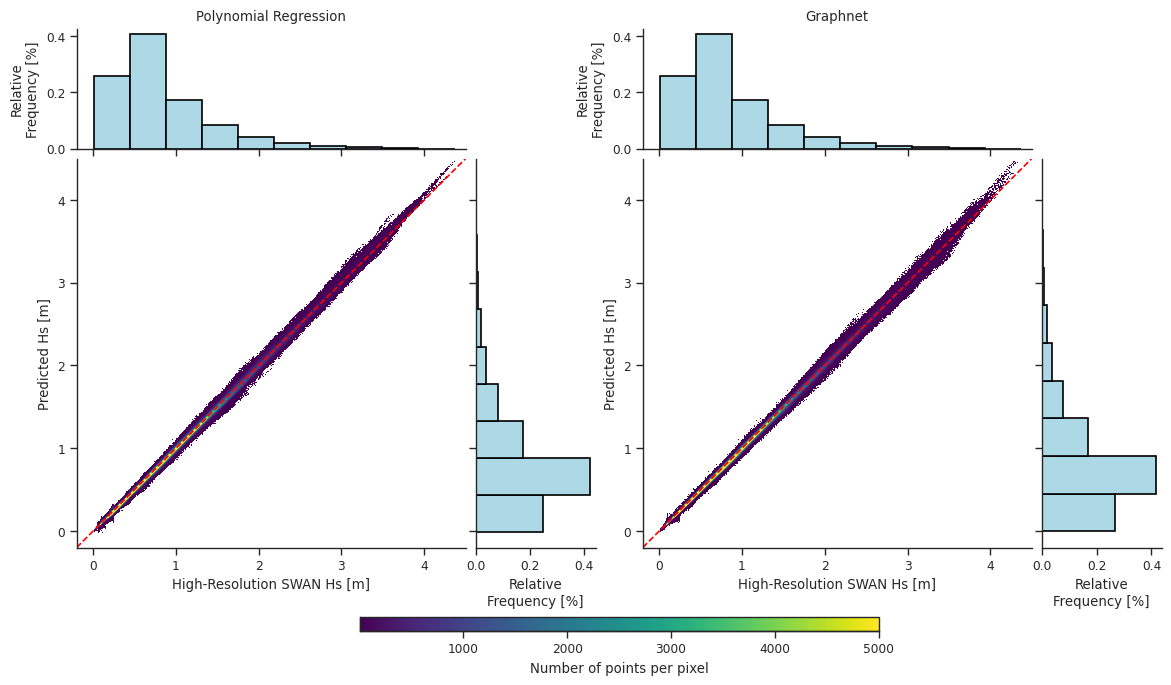

In [56]:
mosaic = [["poly", "poly", "graph", "graph"],
          [".", "cbar", "cbar", "."]]

fig, axs = plt.subplot_mosaic(mosaic=mosaic, figsize=(14, 8),
                              height_ratios=[4, 0.1])

# Set x,y-limits manually
xy_min, xy_max = -0.2, 4.5

# ------------------------- Polynomial regression
ax = axs["poly"]
dsartist = mm.scatter_density(y_test, pred_lin, ax=ax, vmax=5000, with_cbar=False)
ax.axline((0, 0), (1, 1), color="red", linestyle="--", linewidth=1.2)

ax.set_aspect(1.)

# Create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# Make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)


bins = 10
weights = np.ones_like(y_test) / len(y_test)

ax_histx.hist(y_test, bins=bins, orientation="vertical", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)
ax_histy.hist(pred_lin, bins=bins, orientation="horizontal", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)

ax_histx.set_ylabel("Relative\nFrequency [%]")
ax_histy.set_xlabel("Relative\nFrequency [%]")

ax.set_xlim(xy_min, xy_max)
ax.set_ylim(xy_min, xy_max)

ax.set_xlabel("High-Resolution SWAN Hs [m]")
ax.set_ylabel("Predicted Hs [m]")

ax_histx.set_title("Polynomial Regression")

# ------------------------- Graphnet
ax = axs["graph"]
mm.scatter_density(y_test, pred, ax=ax, vmax=5000, with_cbar=False,)
ax.axline((0, 0), (1, 1), color="red", linestyle="--", linewidth=1.2)

ax.set_aspect(1.)

# Create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# Make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)


bins = 10
weights = np.ones_like(y_test) / len(y_test)

ax_histx.hist(y_test, bins=bins, orientation="vertical", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)
ax_histy.hist(pred, bins=bins, orientation="horizontal", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)

ax_histx.set_ylabel("Relative\nFrequency [%]")
ax_histy.set_xlabel("Relative\nFrequency [%]")

ax.set_xlim(xy_min, xy_max)
ax.set_ylim(xy_min, xy_max)

ax.set_xlabel("High-Resolution SWAN Hs [m]")
ax.set_ylabel("Predicted Hs [m]")

ax_histx.set_title("Graphnet")

# ------------------------- Colorbar
fig.colorbar(dsartist, cax=axs["cbar"], orientation="horizontal",
             label="Number of points per pixel")

# ------------------------- General Settings
sns.set_theme(context="paper", style="ticks")
sns.despine()

out_path = Path("plots") / f"region{nregion}" / "scatter_density_detailed-hs-dir"
out_path.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(out_path, bbox_inches="tight")

plt.show()

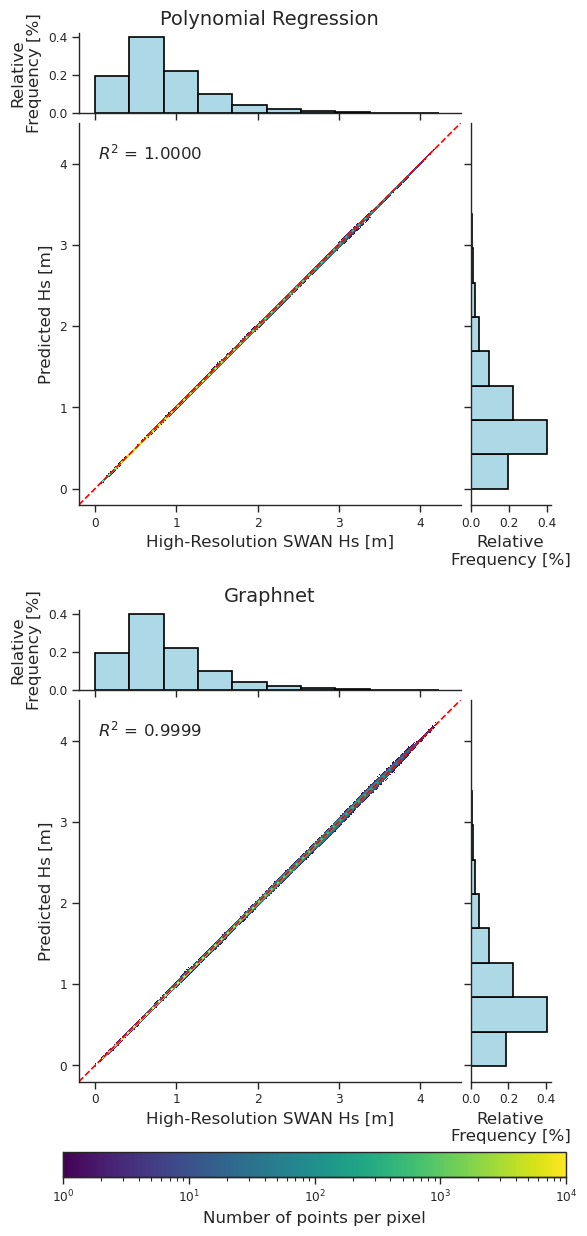

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(6, 12), height_ratios=[1, 1],
                        constrained_layout=True, gridspec_kw={"hspace": 0.1})

# Set x,y-limits manually
xy_min, xy_max = -0.2, 4.5
# Set histogram ticks manually
freqs = (0, 0.2, 0.4)

# ------------------------- Compute the coefficients of determination
r2_lin = r2_score(y_test, pred_lin)
r2_gnn = r2_score(y_test, pred)

# ------------------------- Polynomial regression
ax = axs[0]
dsartist = mm.scatter_density(y_test, pred_lin, ax=ax, vmax=1e4, with_cbar=False, norm="log")
ax.axline((0, 0), (1, 1), color="red", linestyle="--", linewidth=1.2)

ax.set_aspect(1.)

# Create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 0.8, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 0.8, pad=0.1, sharey=ax)

# Make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)


bins = 10
weights = np.ones_like(y_test) / len(y_test)

ax_histx.hist(y_test, bins=bins, orientation="vertical", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)
ax_histy.hist(pred_lin, bins=bins, orientation="horizontal", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)

ax_histx.set_ylabel("Relative\nFrequency [%]")
ax_histy.set_xlabel("Relative\nFrequency [%]")

ax_histx.set_yticks(freqs)
ax_histy.set_xticks(freqs)

ax.set_xlim(xy_min, xy_max)
ax.set_ylim(xy_min, xy_max)

# Create a textbox with the R^2 value in the upper left corner
textstr = f"$R^2$ = {r2_lin:.4f}"
props = dict(boxstyle="round", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment="top", bbox=props)

ax.set_xlabel("High-Resolution SWAN Hs [m]")
ax.set_ylabel("Predicted Hs [m]")

ax_histx.set_title("Polynomial Regression")

# ------------------------- Graphnet
ax = axs[1]
mm.scatter_density(y_test, pred, ax=ax, vmax=1e4, with_cbar=False, norm="log")
ax.axline((0, 0), (1, 1), color="red", linestyle="--", linewidth=1.2)

ax.set_aspect(1.)

# Create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 0.8, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 0.8, pad=0.1, sharey=ax)

# Make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

bins = 10
weights = np.ones_like(y_test) / len(y_test)

ax_histx.hist(y_test, bins=bins, orientation="vertical", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)
ax_histy.hist(pred, bins=bins, orientation="horizontal", color="lightblue",
              edgecolor="black", linewidth=1.2, weights=weights)

ax_histx.set_ylabel("Relative\nFrequency [%]")
ax_histy.set_xlabel("Relative\nFrequency [%]")

ax_histx.set_yticks(freqs)
ax_histy.set_xticks(freqs)

ax.set_xlim(xy_min, xy_max)
ax.set_ylim(xy_min, xy_max)

# Create a textbox with the R^2 value in the upper left corner
textstr = f"$R^2$ = {r2_gnn:.4f}"
props = dict(boxstyle="round", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment="top", bbox=props)

ax.set_xlabel("High-Resolution SWAN Hs [m]")
ax.set_ylabel("Predicted Hs [m]")

ax_histx.set_title("Graphnet")

# ------------------------- Colorbar
fig.colorbar(dsartist, ax=axs[1], orientation="horizontal",
             label="Number of points per pixel", shrink=0.85)

# ------------------------- General Settings
sns.set_theme(context="paper", style="ticks")
sns.despine()

plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

out_path = Path("plots") / f"region{nregion}" / "scatter_density_detailed-hs-dir-vert"
out_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path, bbox_inches="tight")

plt.show()